**AUTHORS:** \\
Bennett Bierman \\
Filippo Nardi \\
Jorge Parreño \\
Jaime Martinez \\
Robert Glazer

In [ ]:
from IPython import display
from IPython.core.display import Image

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Degree in Data Science and Engineering, group 96
## Machine Learning 2
### Fall 2023

&nbsp;
&nbsp;
&nbsp;
# Lab 2. Support Vector Machines for Classification

&nbsp;
&nbsp;
&nbsp;

**Emilio Parrado Hernández**

Dept. of Signal Processing and Communications

&nbsp;
&nbsp;
&nbsp;




<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

# Loading the dataset

In this assignment you will work with an adaptation of the UCI repository dataset [segmentation]('https://archive.ics.uci.edu/ml/datasets/image+segmentation'). It is a binary classification task (labels are $+1$ and $-1$, respectively).

The following cell loads the data and constructs the corresponding training and testing sets.

In [ ]:

train_data = np.loadtxt('segmentation.data', delimiter=',')
X_train = train_data[:,1:]
y_train = train_data[:,0]
test_data = np.loadtxt('segmentation.test', delimiter=',')
X_test = test_data[:,1:]
y_test = test_data[:,0]

# 1.- Linear SVC

The first method we are going to use to solve the problem is a SVM endowed with a **linear kernel**. The performance of this model depends on the value of the regularization hyperparameter $C$.

## 1.1- Validation the hard way

In order to find which is the best value of $C$ in order to achieve the best generalization (a great performance on the test set without using the test set we are implementing the following **validation the hard way** procedure:

- Split **the training dataset** in two subsets:
    - actual training subset (70% of the data): `Xr` (observations) and `Yr` (targets)
    - validation subset (30% of the data): `Xv` and `Yv`

- Define `v_C` as a list with the following values for the parameter $C$: $10^{-3},$ $10^{-2},$ $10^{-1},$ $1,$ $10,$ $10^3,$ and $10^4$

 - Define `validation_accuracy` as an empty array with size equal to the length of `v_C`.

 - Run a loop with one iteration per member of `v_C`. At each iteration perform the following operations:
     - Instantiate a SVC with linear kernel and the value of $C$ corresponding to this iteration
     - Train the SVC with `Xr` and `Yr`
     - Evaluate the SVC with `Xv` and `Yv` and store the accuracy in the corresponding position of `validation_accuracy`
     
     


In [ ]:
#############
#           #
# YOUR CODE #
#           #
#############

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

Xr, Xv, Yr, Yv = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
v_C = [10**-3, 10**-2, 10**-1, 1, 10, 10**3, 10**4]
validation_accuracy = np.empty(len(v_C))

for idx,val in enumerate(v_C):
  svm = SVC(C=val, kernel='linear')
  svm.fit(Xr, Yr)
  validation_accuracy[idx] = svm.score(Xv, Yv)

In [ ]:
for idx, val in enumerate(v_C):
  print(f'C={val}: Val Acc={validation_accuracy[idx]}')

C=0.001: Val Acc=0.8095238095238095
C=0.01: Val Acc=0.8095238095238095
C=0.1: Val Acc=0.873015873015873
C=1: Val Acc=0.9047619047619048
C=10: Val Acc=0.9206349206349206
C=1000: Val Acc=0.9047619047619048
C=10000: Val Acc=0.9047619047619048


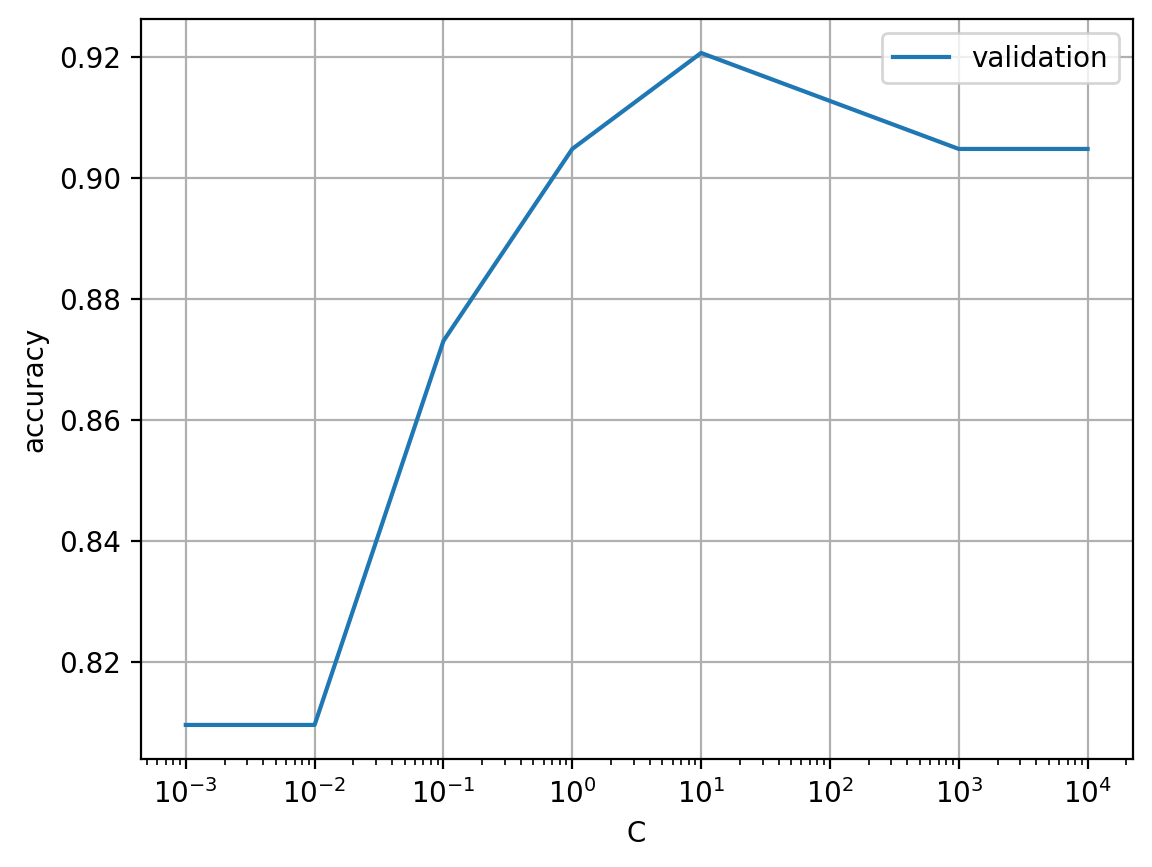

In [ ]:
# do not edit this cell, just run it
plt.plot(np.array(v_C), validation_accuracy, label='validation')
plt.ylabel('accuracy')
plt.xlabel('C')
plt.grid()
plt.xscale('log')
_=plt.legend()

#### Discussion

- What is the value of $C$ that yields the better performance?

- What is the difference between the best value and the second best?

- Do you think it worths exploring larger or smaller values for $C$ (I mean, enlarging the explored range)?

#### Your answer:

- A1: $C = 10$

- A2: $0.920634920634920 -  0.9047619047619048 = 0.01587301587$

- A3: It might be worth exploring other values of $C$ close to the value of 10, but it does not seem worth it to explore values less than $10^{-3}$ or greater than $10^{4}$. These edge values performed poorly, and based on the shape of the above graph, more extreme values would likely perform even worse. This is especially true for small values of $C$ which produced the worse validation accuracies. This makes sense since C is suppose to balance our want to perform well on the training data and create a wide margin that that should generalize well on the test data. Disregarding the training classification or disregarding the size of the margin should cause the model to perform poorly.

#### Extra Discussion

Mathematically we are trying to maximize the accuracy function $a(c)$ where $C$ is our support vector classifier trained for some margin. The issues with the procedure are two, first, the discretization error that our limited grid of value entails, because by taking a limited set of points essentially we are interpolating $a$ so the value may not be precise. Also we must consider the possibility that the achieved maximum accuracy is in fact a local maximum and not a global one.

Since a finer search of parameter C around the value 10 does not improve overfitting (since we are not taking into account the test dataset on this parameter optimization), we can narrow the search of parameter C on less spread values around 10,or in other words improve precision of our interpolation accuracy.


In [ ]:
n_v_C = [10**0, 2*10**0, 4*10**0, 6*10**0, 8*10**0, 10**1, 2.5*10, 5*10, 10**2]
n_validation_accuracy = np.empty(len(n_v_C))

for idx,val in enumerate(n_v_C):
  svm = SVC(C=val, kernel='linear')
  svm.fit(Xr, Yr)
  n_validation_accuracy[idx] = svm.score(Xv, Yv)

In [ ]:
# visualize accuracies
for idx, val in enumerate(n_v_C):
  print(f'C={val}: Val Acc={n_validation_accuracy[idx]}')

C=1: Val Acc=0.9047619047619048
C=2: Val Acc=0.9365079365079365
C=4: Val Acc=0.9365079365079365
C=6: Val Acc=0.9206349206349206
C=8: Val Acc=0.9047619047619048
C=10: Val Acc=0.9206349206349206
C=25.0: Val Acc=0.873015873015873
C=50: Val Acc=0.9047619047619048
C=100: Val Acc=0.9047619047619048


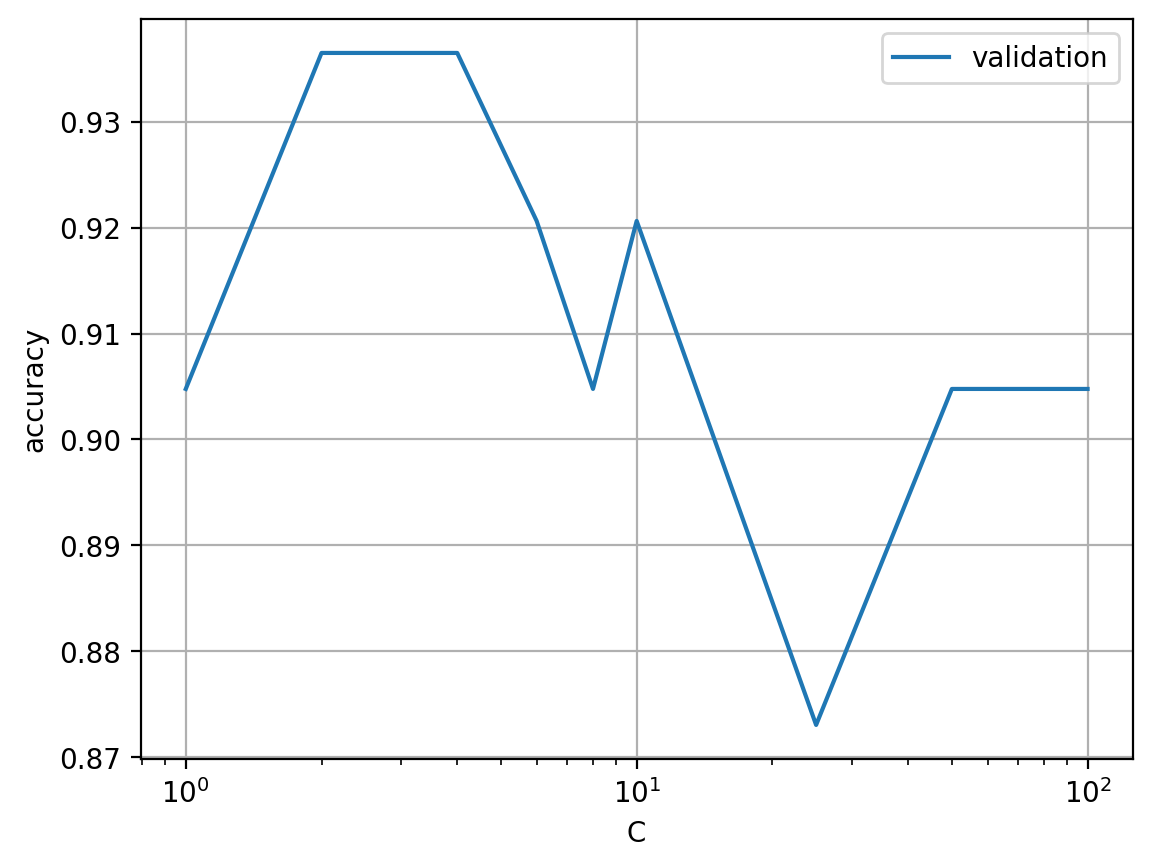

In [ ]:
# visualize graph
plt.plot(np.array(n_v_C), n_validation_accuracy, label='validation')
plt.ylabel('accuracy')
plt.xlabel('C')
plt.grid()
plt.xscale('log')
_=plt.legend()

#### Extra Discussion Answers (same question, narrower interval around C)

- A1: Values around C = 2 and C = 4

- A2: 0.9365079365079365 - 0.9206349206349206 = 0.0158730158730159

- A3: Since we have reduced the search to a narrower interval around 10, to improve our approximation of the accuracy function $a$, it makes no sense to enlarge it now, since we determined from before that the local maximum was around there, we improve the resolution to pinpoint a more exact value for the local maximum.


Now we are going to check if the validation found the best parameter for the test set. In the next cell implement the following code:

- Define `test_accuracy` as an empty array with size equal to the length of `v_C`.

 - Run a loop with one iteration per member of `v_C`. At each iteration perform the following operations:
     - Instantiate a SVC with linear kernel and the value of $C$ corresponding to this iteration
     - Train the SVC with `X_train` and `y_train`
     - Evaluate the SVC with `X_test` and `y_test` and store the accuracy in the corresponding position of `test_accuracy`

In [ ]:
#############
#           #
# YOUR CODE #
#           #
#############

test_accuracy = np.empty(len(v_C))

for idx,val in enumerate(v_C):
  svm = SVC(C=val, kernel='linear')
  svm.fit(Xr, Yr)
  test_accuracy[idx] = svm.score(X_test, y_test)

In [ ]:
for idx, val in enumerate(v_C):
  print(f'C={val}: Test Acc={test_accuracy[idx]}')

C=0.001: Test Acc=0.8357142857142857
C=0.01: Test Acc=0.8576190476190476
C=0.1: Test Acc=0.8647619047619047
C=1: Test Acc=0.88
C=10: Test Acc=0.8923809523809524
C=1000: Test Acc=0.8952380952380953
C=10000: Test Acc=0.8928571428571429


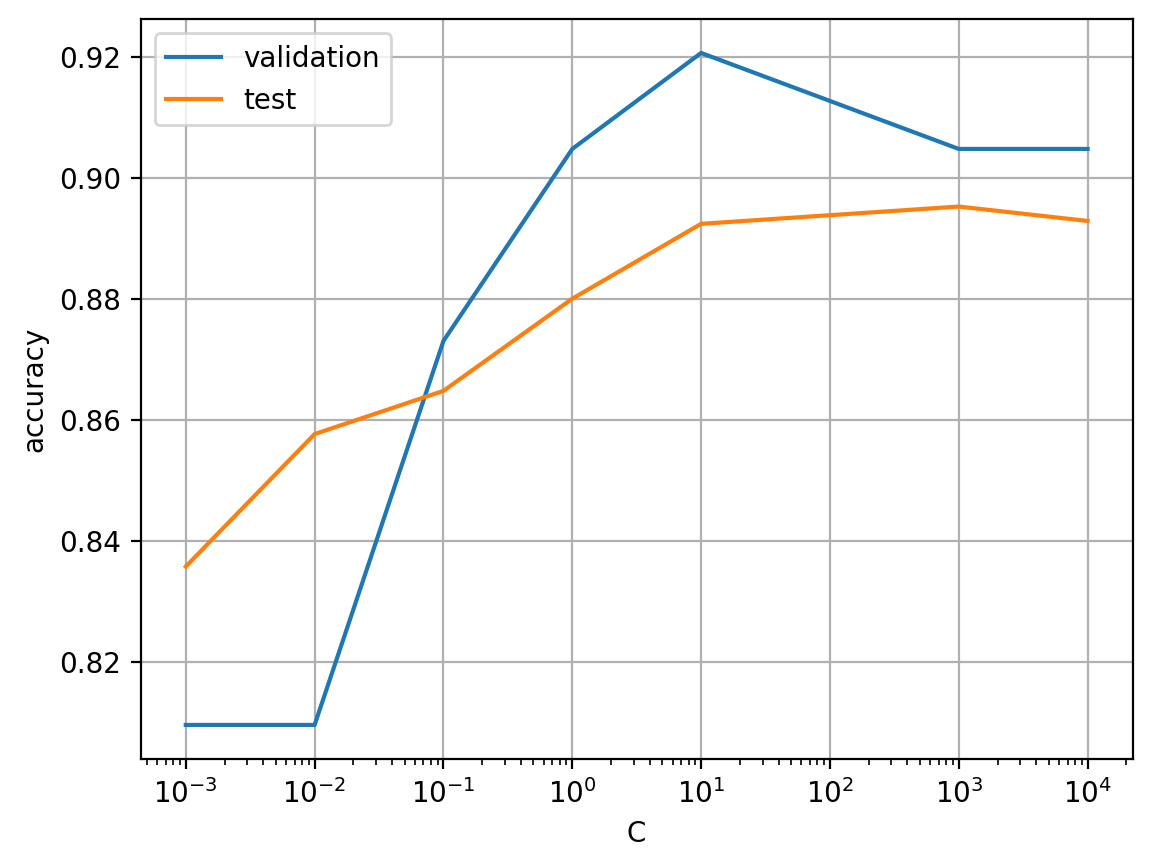

In [ ]:
# do not edit this cell, just run it
plt.plot(np.array(v_C), validation_accuracy, label='validation')
plt.plot(np.array(v_C), test_accuracy, label='test')
plt.ylabel('accuracy')
plt.xlabel('C')
plt.grid()
plt.xscale('log')
_=plt.legend()

#### Discussion

- What is the value of $C$ that would yield the better performance in the test set?

- What is the difference between the best accuracy found for the test set and the accuracy that you will obtain if you use the value of $C$ found with validation?

- Do you think it worths exploring larger or smaller values for $C$ (I mean, enlarging the explored range)?

#### Your answer:

- A1: $C=10^3$

- A2: Best test accuracy: 0.8952380952380953 \\
Validation at $C=10^3$: 0.9047619047619048 \\
Difference: 0.9047619047619048 - 0.8928571428571429 = 0.0119047619

- A3: It does not seem worth it to explore smaller values. Both the test data and training data show a trend of decreasing accuracy as C becomes smaller than 10. It is probably not worth exploring larger values than $10^4$ either, since our accuracy trend has peaked and begun to decrease by this value of C. Too large of C values tend not to generalize well on test data since their margins are so small. However, as is always the case, our maximum is likely a local rather than a global one, so a little more exploration could always be fruitfull.

#### Extra Discussion:

In [ ]:
n_v_C = [10**0, 2*10**0, 4*10**0, 6*10**0, 8*10**0, 10**1, 2.5*10, 5*10, 10**2]
n_test_accuracy = np.empty(len(n_v_C))

for idx,val in enumerate(n_v_C):
  svm = SVC(C=val, kernel='linear')
  svm.fit(Xr, Yr)
  n_test_accuracy[idx] = svm.score(X_test, y_test)

In [ ]:
# visualize accuracies
for idx, val in enumerate(n_v_C):
  print(f'C={val}: Val Acc={n_test_accuracy[idx]}, Test Acc={n_validation_accuracy[idx]}')

C=1: Val Acc=0.88, Test Acc=0.9047619047619048
C=2: Val Acc=0.8866666666666667, Test Acc=0.9365079365079365
C=4: Val Acc=0.9014285714285715, Test Acc=0.9365079365079365
C=6: Val Acc=0.8909523809523809, Test Acc=0.9206349206349206
C=8: Val Acc=0.8904761904761904, Test Acc=0.9047619047619048
C=10: Val Acc=0.8923809523809524, Test Acc=0.9206349206349206
C=25.0: Val Acc=0.9071428571428571, Test Acc=0.873015873015873
C=50: Val Acc=0.9052380952380953, Test Acc=0.9047619047619048
C=100: Val Acc=0.9038095238095238, Test Acc=0.9047619047619048


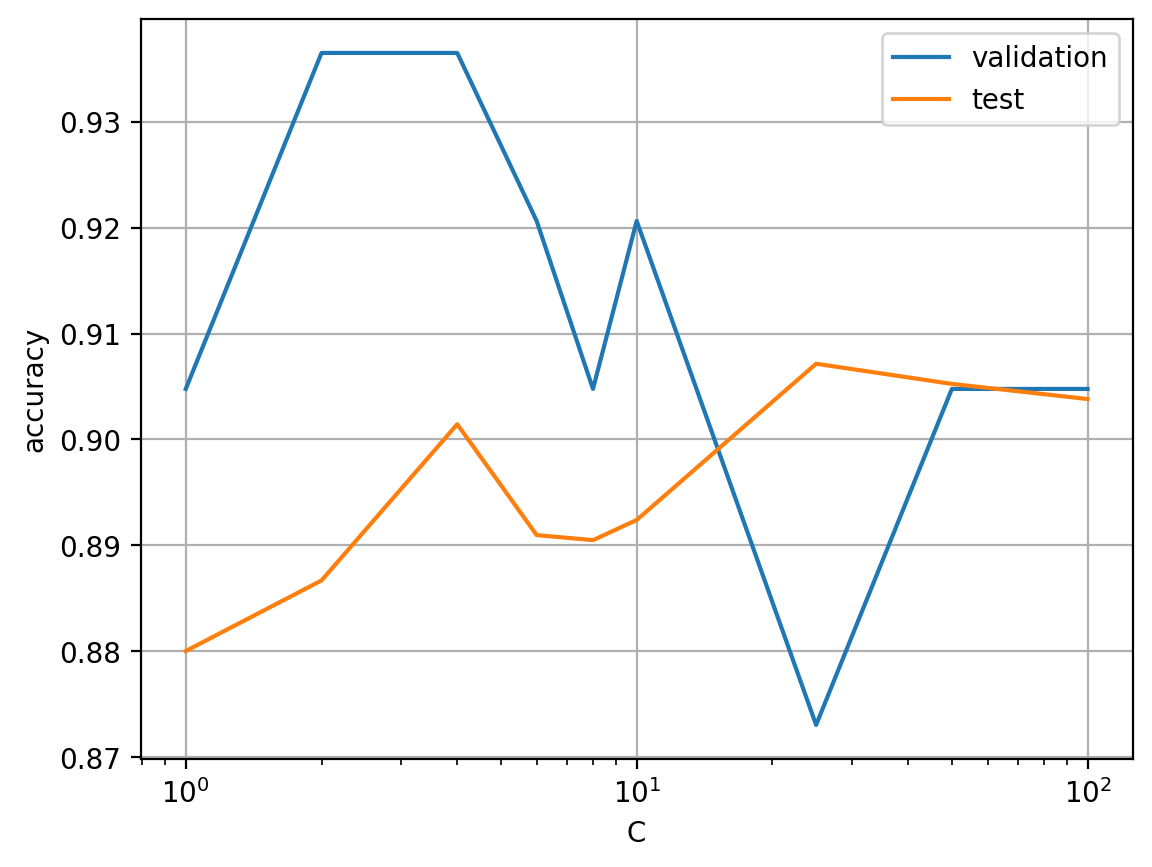

In [ ]:
# visualize graph
plt.plot(np.array(n_v_C), n_validation_accuracy, label='validation')
plt.plot(np.array(n_v_C), n_test_accuracy, label='test')
plt.ylabel('accuracy')
plt.xlabel('C')
plt.grid()
plt.xscale('log')
_=plt.legend()

# NOT WELL DONE, CODE NEEDS TO BE IMPROVED

#### Extra Discussion Answers (same question, narrower interval around C)

- A1: The value of C which corresponds to the highest accuracy is C = 25, with a local maximum at C = 4

- A2: 0.9365079365079365 - 0.9071428571428571 = 0.029365079365079372

- A3: Following the same reasoning of resolution improvement of the accuracy function it would be futile to enlarge the interval when we reduced it to improve our approximation.

## 1.2.- GridSearchCV

The next step is to use crossvalidation to do the hyperparameter search in a more systematic and clean way.

### Grids of hyperparameters

This method consists in to form a **grid** with a number of dimensions equal to the number of hyperparameters that one needs to optimize. The size of each dimension of the grid is equal to the number of values in the range of the corresponding hyperparameter. Notice that this method explores **discrete** ranges for each hyperparameter.

For the SVC with linear kernel we will initially explore the following range:


- `C` $ \in$ $[10^{-3},$ $10^{-2},$ $10^{-1},$ $1,$ $10,$ $10^3,$  $10^4]$

Notice this range determine a $7 \times 1$ grid.

In models that depend on a larger number of hyperparameters one has to be careful with the granularity of the ranges as the combinatorial explosion of the size of the grid can be hard to manage.

### Cross validation

Cross validation is a commonly used procedure in machine learning to simulate the effect of training a model with a set of data and evaluate its generalization capabilities as the performance in a **separate dataset**.

The cross validation process involves the following steps:

- Randomly partition the training dataset in $N$ disjoint subsets of similar sizes. Each of this subsets is called **fold** in machine learning jargon. Hence the term **N-fold cross validation**.

- Let us suppose we have chosen $N=3$ folds. This means the training data has been split in three subsets: $(X_1, Y_1)$, $(X_2, Y_2)$ y $(X_3, Y_3)$.

- Create an instance of the model with the corresponding hyperparameters. The cross validation follows with the execution of the following loop

    For $n=1,2,\dots,N$ iterations:  
    1. Choose $(X_n,Y_n)$ as **validation set** for iteration $n$
    2. Prepare a **training set** for iteration $n$ joining the rest of the subsets (excluding the validation set)
    3. Fit the model instance with the training set of step 2
    4. Evaluate  the model instance (method `score`) with the validation set of step 1
    5. Keep the *score* achieved in the $n$ iteration.

- Once the loop is finished, we have $N$ scores, each corresponding to the evaluation of the model fitted in each iteration with the corresponding validation set.
- Estimate the **real score** that an instance of the model fitted using all the data would yield in a separate dataset computing the **mean** and **standard deviation** of the $N$ validation scores.

Typical values for the number of folds include $N\in \{3, 5, 10\}$


###  Cross validation to explore the grid

The grid is explored by a loop that visits all its nodes and runs a  **cross validation** to estimate the test performance that the model would yield if it were fitted using the values for hyperparameter that correspond to that node.

Once all the nodes of the grid have been cross validated, the procedure outputs the combination of hyperparameters corresponding to the node with the best cross validation performance.

###  Grid search in sklearn

There is a module in sklearn that implements this algorithm for exploring a grid of hyperparameters with cross validation: [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)


In the following cell implement code that:
- define `param_lsvc`, a dictionary that will serve as dictionary of parameters for the range of $C$
- instantiate `grid_lsvc`, an `GridSearchCV` object with a SVC with linear kernel as estimator and `param_lsvc` as parameter dictionary.
- Train `grid_lsvc` with `X_train` and `y_train`

In [ ]:
#############
#           #
# YOUR CODE #
#           #
#############

from sklearn.model_selection import GridSearchCV

param_lsvc = {'C':v_C}
grid_lsvc = GridSearchCV(SVC(kernel='linear'), param_lsvc)
grid_lsvc.fit(X_train, y_train)

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 1000, 10000]})

In [ ]:
print(grid_lsvc.best_params_)

{'C': 10}


Now look at attribute `grid_lsvc.cv_results_` to identify fields that store:
- the values of parameter $C$ used in each node of the grid. Store them in an array called `values_of_C`
- the average score achieved by the model in each node of the grid. Store them in an array called `Mean_acc`
- the standard deviation of the scores achieved by the model in each node of the grid. Store them in an array called `Std_acc`

In [ ]:
#############
#           #
# YOUR CODE #
#           #
#############

values_of_C = np.array(grid_lsvc.cv_results_['param_C'], dtype=float)
Mean_acc = grid_lsvc.cv_results_['mean_test_score']
Std_acc = grid_lsvc.cv_results_['std_test_score']

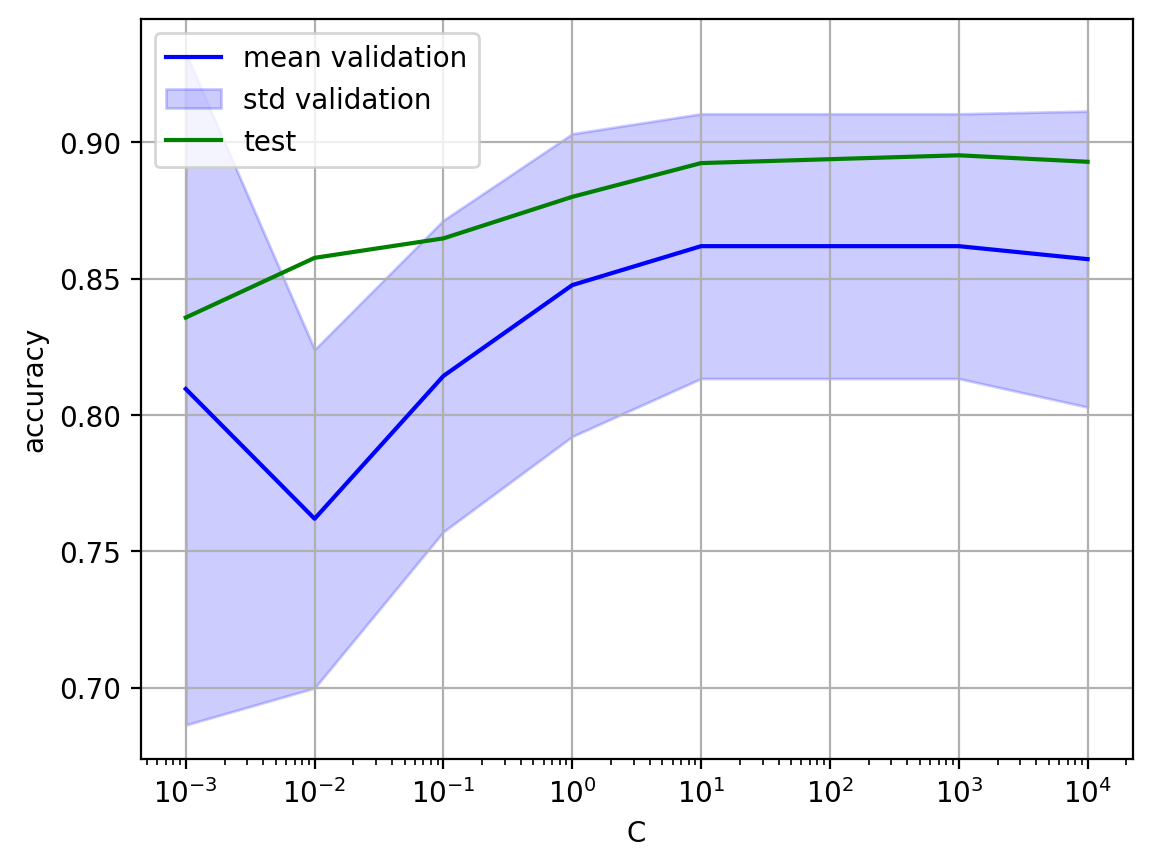

In [ ]:
# do not edit this cell, just run it
plt.plot(values_of_C, Mean_acc, label='mean validation', color='blue')
plt.fill_between(values_of_C,
                 Mean_acc - Std_acc,
                 Mean_acc + Std_acc,
                 label='std validation',
                 alpha=0.2,
                 color='blue')
plt.plot(values_of_C, test_accuracy, label='test', color='green')
plt.ylabel('accuracy')
plt.xlabel('C')
plt.grid()
plt.xscale('log')
_=plt.legend()

#### Discussion

- What is the value of $C$ that suggest GridSearchCV?

- What is the difference between the best accuracy found for the test set and the accuracy that you will obtain (on the test set) if you use the value of $C$ found by GridSearchCV?

- Is there any significant difference between GridSearchCV and validation the hard way?

#### Your answer:

- A1: $C=10$

- A2: Highest accuracy on test set: 0.8952380952380953 \\
Test accuracy at GridSearchCV's recommend $C$ value: 0.8923809523809524 \\
Difference: 0.8952380952380953 - 0.8923809523809524 = 0.00285714285

- A3: No, there was not a significant different between GridSearchCV and validation the hard way. Even though they produced different values of $C$, those different values produced nearly identical test accuracies - only 0.29% difference. This small difference can be explained according to some phenomena, for example the existance of outliers or the mere randomness introduced by validating the hard way when selecting the instances belonging to each of the sets

## 1.3.- Running times

GridSearchCV also provides with information about the times needed to train and to evaluate the algorithm. Identify what are the fields that provide with that information inside `grid_lsvc.cv_results_` and produce two plots, similar to the previous one in which you show:
- plot 1: The time (in seconds) employed to train the model vs. the value of $C$
- plot 2: The time (in seconds) employed to evaluate the model vs. the value of $C$

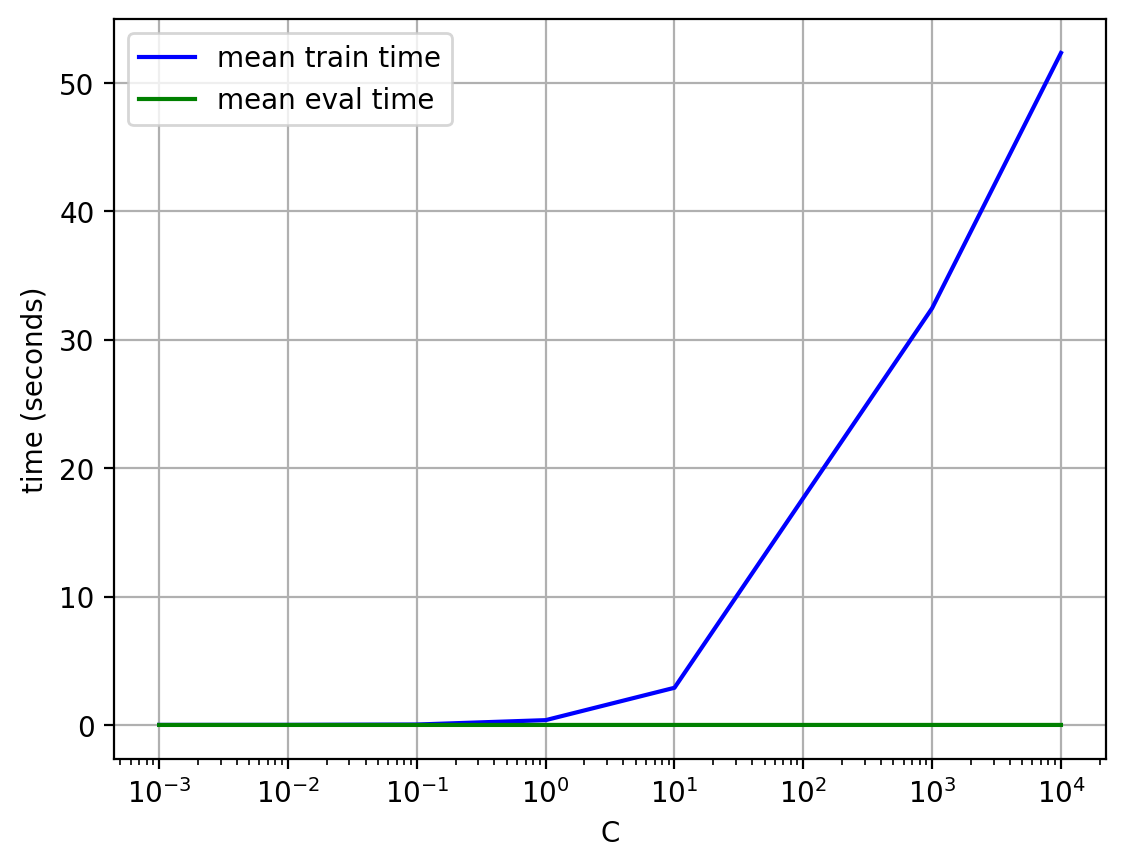

In [ ]:
#############
#           #
# YOUR CODE #
#           #
#############

train_time = grid_lsvc.cv_results_['mean_fit_time']
eval_time = grid_lsvc.cv_results_['mean_score_time']

plt.plot(values_of_C, train_time, label='mean train time', color='blue')
plt.plot(values_of_C, eval_time, label='mean eval time', color='green')
plt.ylabel('time (seconds)')
plt.xlabel('C')
plt.grid()
plt.xscale('log')
_=plt.legend()

#### Discussion

- How is the evolution of the training time with $C$?

- How is the evolution of the evaluation time with $C$?

#### Your answer:

- A1: The evolution of the training time seems to be exponential (over the log x-scale), or at least taking more time for each value. This is explained since a low C parameter entails a low weight given to misclasifications, which allows the algorithm to select in a laxer way the hyperplane which defines the classification criteria. However, increasing the parameter C generates the opposing effect, so the algorithm has to spend more time trying to avoid misclassifications searching for a lower margin hyperplane

- A2: In this case, the evaluation time seems to hardly change, since in this case we are only taking into account the time used for analysing whether or not an instance is well classified or not. This process is quite simple and does not entail any complex calculation, which means a similar time for all values of C

# 2.- Explore different kernels

After obtaining results with the linear kernel, we will explore the performance of the SVM endowed with RBF and polynomial kernels.

## 2.1.- RBF kernel

The RBF kernel introduces a new hyperparameter in the model, the spread of the kernel $\gamma$. We will consider the following range of values:
$$
\gamma \in [10^{-5}, 10^{-4}, 10^{-3}, 10^{-2}, 10^{-1}, 1, 10]
$$

Therefore our crossvalidation grid search needs to expand one more dimension to allocate this range.

In the next cell implement code that:
- Defines `v_g`, an array with the range of values for `gamma`
- Defines `param_rbf_svc`, a dictionary with the ranges of $\gamma$ and $C$ for the SVM
- Creates `grid_rbf_svc`, a `GridSearchCV` object with an SVC as estimator and  `param_rbf_svc` as parameter dictionary
- Train `grid_rbf_svc` with `X_train` and `y_train`

In [ ]:
#############
#           #
# YOUR CODE #
#           #
#############

v_g = [10**i for i in range(-5, 2)]
param_rbf_svc = {'gamma':v_g, 'C':v_C}

grid_rbf_svc = GridSearchCV(SVC(kernel='rbf'), param_rbf_svc)
grid_rbf_svc.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 1000, 10000],
                         'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10]})

In [ ]:
print(grid_rbf_svc.best_params_)

{'C': 1000, 'gamma': 1e-05}


Now we need to retrieve useful information from attribute `cv_results_`, in particular:
- store in `C_values` the values of parameter $C$ used in each node of the grid
- store in `gamma_values` the values of parameter $\gamma$ used in each node of the grid
- store in `Acc` the average validation score obtained in each node of the grid


In [ ]:
#############
#           #
# YOUR CODE #
#           #
#############

C_values = grid_rbf_svc.cv_results_['param_C']
gamma_values = grid_rbf_svc.cv_results_['param_gamma']
Acc = grid_rbf_svc.cv_results_['mean_test_score']

In [ ]:
# do not edit this cell, just run it
results_rbf = (pd.DataFrame(np.vstack((C_values,
                                 gamma_values,
                                 Acc)).T,
                      columns=['C','gamma','Acc'])).pivot(index='C', columns='gamma')
results_rbf

Acc                                                    \
gamma      0.00001   0.00010   0.00100   0.01000   0.10000   1.00000    
C                                                                       
0.001      0.571429  0.571429  0.571429  0.571429  0.571429  0.571429   
0.010      0.571429  0.571429  0.571429  0.571429  0.571429  0.571429   
0.100      0.566667  0.719048  0.571429  0.571429  0.571429  0.571429   
1.000      0.804762  0.747619  0.771429  0.633333  0.571429  0.571429   
10.000     0.795238  0.857143  0.809524  0.642857  0.571429  0.571429   
1000.000   0.871429  0.790476  0.804762  0.642857  0.571429  0.571429   
10000.000  0.809524  0.790476  0.804762  0.642857  0.571429  0.571429   

                     
gamma      10.00000  
C                    
0.001      0.571429  
0.010      0.571429  
0.100      0.571429  
1.000      0.571429  
10.000     0.571429  
1000.000   0.571429  
10000.000  0.571429

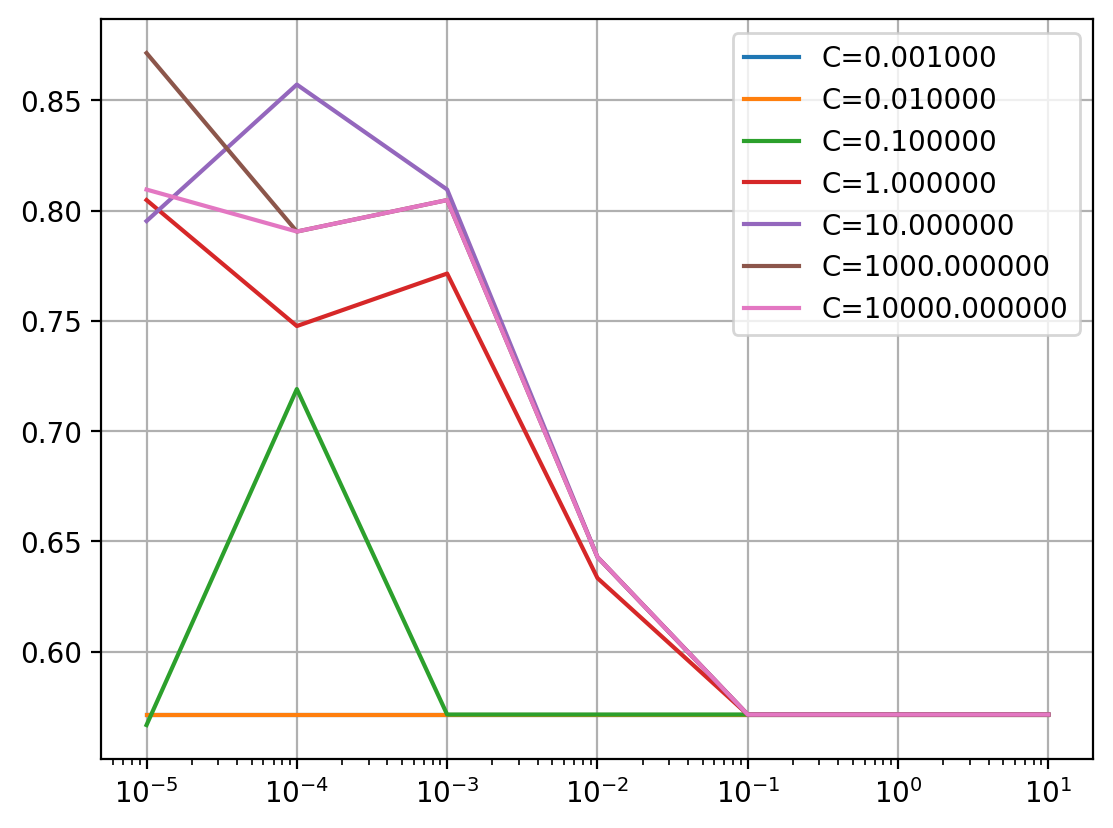

In [ ]:
plt.figure()
for iC, C in enumerate(results_rbf.index):
    plt.plot(v_g, results_rbf.loc[C].values, label='C={0:f}'.format(C))
plt.xscale('log')
plt.grid()
_=plt.legend()

#### Discussion

- What are the best values of $C$ and $\gamma$ that yield the better performance in crossvalidation?

- Do you think it worths exploring larger or smaller values for $C$ and/or $\gamma$?

#### Your answer

- A1: $C=10^3$ and $\gamma = 10^{-5}$, which produced an accuracy of 0.871429

- A2: It might be worth exploring larger values for C and smaller values for gamma, since the worst results in general were achieved by  large gamma and little C parameters. This is what will be done in the following code cell:

#### Extra Discussion:

In [ ]:
v_g_n = [10**i for i in range(-9, -1)]
v_C_n = [10**i for i in range(3, 11)]
param_rbf_svc_n = {'gamma':v_g_n, 'C':v_C_n}

grid_rbf_svc_n = GridSearchCV(SVC(kernel='rbf'), param_rbf_svc_n)
grid_rbf_svc_n.fit(X_train, y_train)

C_values_n = grid_rbf_svc_n.cv_results_['param_C']
gamma_values_n = grid_rbf_svc_n.cv_results_['param_gamma']
Acc_n = grid_rbf_svc_n.cv_results_['mean_test_score']

results_rbf_n = (pd.DataFrame(np.vstack((C_values_n,
                                 gamma_values_n,
                                 Acc_n)).T,
                      columns=['C','gamma','Acc'])).pivot(index='C', columns='gamma')
results_rbf_n

Acc                                                      \
gamma       1.000000e-09 1.000000e-08 1.000000e-07 1.000000e-06 1.000000e-05   
C                                                                              
1000            0.561905     0.747619     0.790476      0.82381     0.871429   
10000           0.742857     0.785714     0.814286     0.833333     0.809524   
100000          0.780952     0.795238     0.833333      0.87619     0.895238   
1000000         0.761905      0.77619     0.871429     0.890476     0.885714   
10000000        0.780952     0.795238     0.895238     0.890476     0.885714   
100000000       0.809524     0.795238     0.866667     0.890476     0.885714   
1000000000      0.790476     0.804762     0.885714     0.890476     0.885714   
10000000000      0.77619     0.814286     0.880952     0.890476     0.885714   

                                                    
gamma       1.000000e-04 1.000000e-03 1.000000e-02  
C                                                   
1000            0.790476     0.804762     0.642857  
10000           0.790476     0.804762     0.642857  
100000          0.790476     0.804762     0.642857  
1000000         0.790476     0.804762     0.642857  
10000000        0.790476     0.804762     0.642857  
100000000       0.790476     0.804762     0.642857  
1000000000      0.790476     0.804762     0.642857  
10000000000     0.790476     0.804762     0.642857

In [ ]:
print(grid_rbf_svc_n.best_params_)

{'C': 100000, 'gamma': 1e-05}


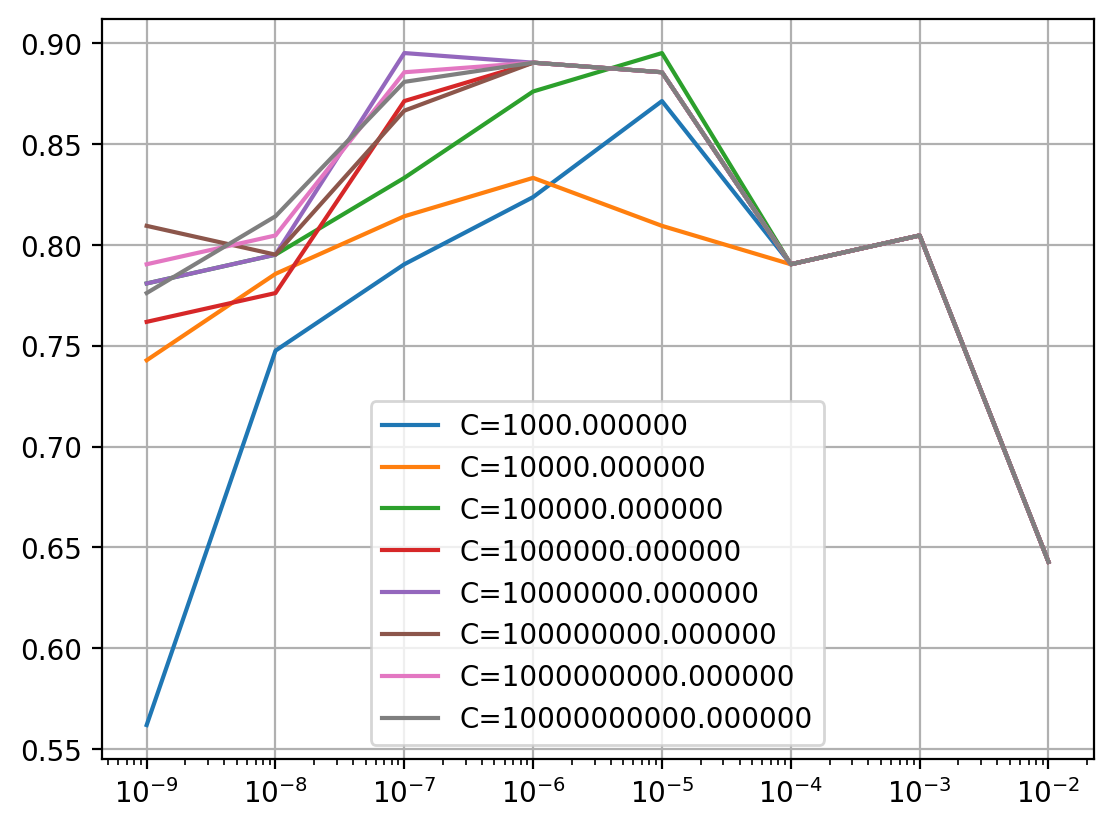

In [ ]:
plt.figure()
for iC, C in enumerate(results_rbf_n.index):
    plt.plot(v_g_n, results_rbf_n.loc[C].values, label='C={0:f}'.format(C))
plt.xscale('log')
plt.grid()
_=plt.legend()

It seems that a wider exposition to lower values of gamma and higher values of C seems to generate higher accuracies, specially between gamma = 10^-7 and 10^-5

When $\gamma$ is small the decision boundary created by the kernel on feature space is a smoother one. This smoother decision boundary blurs out the difference between individual data points.

On the other hand, having a higher value of $C$ imposes larger penalties on misclassification and makes the model more robust to overfitting. This two reasons explain higher accuracies.

The GridSearchCV object has an attribute that facilitates the identification of the best set of hyperparameters (`best_params_`) and also methods to consume the model trained with these best hyperparameters: `score()` and `predict()`.
Print the accuracy in the test set achieved by the SVC with RBF kernel and hyperparameters found by GridSearchCV

In [ ]:
#############
#           #
# YOUR CODE #
#           #
#############

print(f'Best hyperparameters: {grid_rbf_svc.best_params_}')
print(f'Test Accuracy: {grid_rbf_svc.best_estimator_.score(X_test, y_test)}')

Best hyperparameters: {'C': 1000, 'gamma': 1e-05}
Test Accuracy: 0.9171428571428571


#### Discussion

- What kernel gives the best performance in the test set, after tuning the hyperparameters using crossvalidation?



#### Your answer:

- A1: The RBF kernel constructed from $C=1000$ and $\gamma = 10^{-5}$ gives the best performance, with an accuracy of 0.9171428571428571.

## 2.2.- Polynomial kernel

The polynomial kernel introduces a new hyperparameter in the model, the degree of the polynomial $d$. We will consider the following range of values:
$$
d \in [2,3,4,5,6,7,8,9,10]
$$

Therefore our crossvalidation grid search needs to allocate this new range.

In the next cell implement code that:
- Defines `v_d`, an array with the range of values for $d$
- Defines `param_poly_svc`, a dictionary with the ranges of $d$ and $C$ for the SVM
- Creates `grid_poly_svc`, a `GridSearchCV` object with an SVC as estimator and  `param_poly_svc` as parameter dictionary
- Train `grid_poly_svc` with `X_train` and `y_train`

In [ ]:
#############
#           #
# YOUR CODE #
#           #
#############

# Define the range of values for d
v_d = [2,3,4,5,6,7,8,9,10]

# Define the dictionary with ranges for d and C
param_poly_svc = {
    'degree': v_d,  # Range of values for d
    'C': v_C  # Range of values for C
}

# Create a GridSearchCV object with an SVC estimator and param_poly_svc parameter dictionary
grid_poly_svc = GridSearchCV(SVC(kernel='poly'), param_grid=param_poly_svc)  # You can adjust the cv value as needed

# Train grid_poly_svc with X_train and y_train
grid_poly_svc.fit(X_train, y_train)

GridSearchCV(estimator=SVC(kernel='poly'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 1000, 10000],
                         'degree': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [ ]:
print(grid_poly_svc.best_params_)

{'C': 1, 'degree': 3}


Now we need to retrieve useful information from attribute `cv_results_`, in particular:
- store in `C_values_poly` the values of parameter $C$ used in each node of the grid
- store in `d_values` the values of parameter $d$ used in each node of the grid
- store in `Acc_poly` the average validation score obtained in each node of the grid


In [ ]:
#############
#           #
# YOUR CODE #
#           #
#############

# Extract information from cv_results_
C_values_poly = grid_poly_svc.cv_results_['param_C'].data.tolist()
d_values = grid_poly_svc.cv_results_['param_degree'].data.tolist()
Acc_poly = grid_poly_svc.cv_results_['mean_test_score'].tolist()

# Printing the extracted information (optional)
print("C values for each grid node:", C_values_poly)
print("d values for each grid node:", d_values)
print("Average validation scores:", Acc_poly)

C values for each grid node: [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]
d values for each grid node: [2, 3, 4, 5, 6, 7, 8, 9, 10, 2, 3, 4, 5, 6, 7, 8, 9, 10, 2, 3, 4, 5, 6, 7, 8, 9, 10, 2, 3, 4, 5, 6, 7, 8, 9, 10, 2, 3, 4, 5, 6, 7, 8, 9, 10, 2, 3, 4, 5, 6, 7, 8, 9, 10, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Average validation scores: [0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5619047619047619, 0.5714285714285714, 0.5761904761904761, 0.5714285714285714, 0.5714285714285714, 0.5619047619047619, 0.5619047619047619, 0.6285714285714284, 0.5857142857142857, 0.5857142857142857, 0.6666666666666666, 0.6476190476190476, 0.728571428571

In [ ]:
# do not edit this cell, just run it
results_poly = (pd.DataFrame(np.vstack((C_values_poly,
                                 d_values,
                                 Acc_poly)).T,
                      columns=['C','d','Acc'])).pivot(columns='d', index='C')
results_poly

Acc                                                    \
d              2.0       3.0       4.0       5.0       6.0       7.0    
C                                                                       
0.001      0.571429  0.571429  0.571429  0.571429  0.571429  0.571429   
0.010      0.571429  0.571429  0.561905  0.561905  0.628571  0.585714   
0.100      0.728571  0.766667  0.752381  0.742857  0.738095  0.733333   
1.000      0.828571  0.842857  0.823810  0.809524  0.795238  0.804762   
10.000     0.842857  0.842857  0.838095  0.838095  0.823810  0.823810   
1000.000   0.814286  0.733333  0.728571  0.723810  0.733333  0.742857   
10000.000  0.814286  0.776190  0.771429  0.733333  0.714286  0.723810   

                                         
d              8.0       9.0       10.0  
C                                        
0.001      0.561905  0.571429  0.576190  
0.010      0.585714  0.666667  0.647619  
0.100      0.738095  0.747619  0.747619  
1.000      0.804762  0.804762  0.800000  
10.000     0.809524  0.800000  0.780952  
1000.000   0.719048  0.738095  0.738095  
10000.000  0.714286  0.700000  0.742857

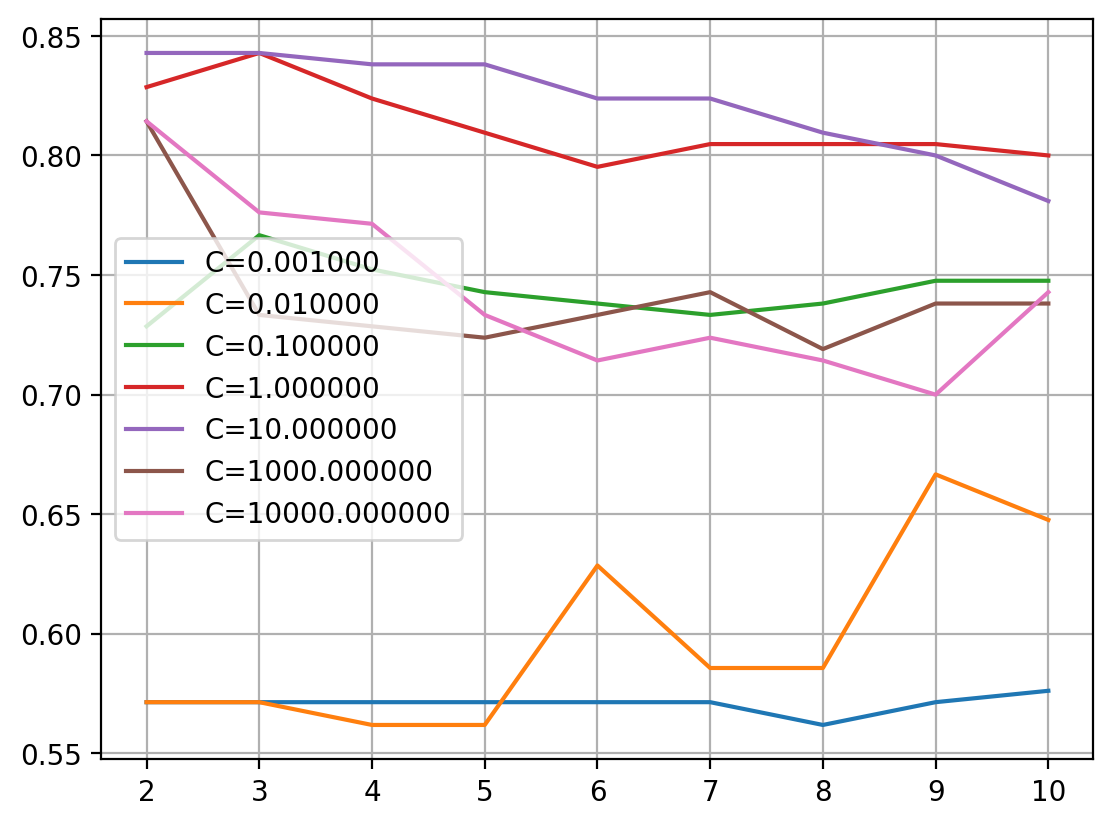

In [ ]:
plt.figure()
for C in results_poly.index:
    plt.plot(v_d, results_poly.loc[C].values, label='C={0:f}'.format(C))
plt.grid()
_=plt.legend()

In [ ]:
print(f'Best hyperparameters: {grid_poly_svc.best_params_}')
print(f'Test Accuracy: {grid_poly_svc.best_estimator_.score(X_test, y_test)}')

Best hyperparameters: {'C': 1, 'degree': 3}
Test Accuracy: 0.8485714285714285


#### Discussion

- What are the best values of $C$ and $d$ that yield the better performance in crossvalidation?

- Do you think it worths exploring larger or smaller values for $C$ and/or $d$?

- What is more critial for the performance of the classifier, the selection of $C$ or the degree?

- What is the performance of the SVM with polynomial kernel and parameters tuned using crossvalidation in the test set? How does it compare with the other two kernels?

#### Your answer

- A1: $C=1$ and $d=3$ yielded accuracy 0.842857

- A2: In this case, the range of C values includes both smaller and larger values. For d, the values from 2 to 10 have been explored. I would say that is worth it, as we can see that there is a significant difference in accuracy between the lowest score (0.728 with C=0.1 and d=2) and the highest score (0.842 with C=1 and d=3).

- A3: In SVMs with a polynomial kernel, the choice of the degree parameter (d) determines the complexity of the decision boundary. Smaller values of d result in simpler, more linear decision boundaries, while larger values of d can lead to more complex, non-linear boundaries. The choice of C controls the trade-off between maximizing the margin and minimizing the classification error. In this case, it seems that the choice of C has a greater impact on the performance - in the graph above, the slopes above are pretty flat, but there are large distnaces between them. However, it seems that the model is more sensitive to a change in d, since d still has a noticeable effect, despite the small range of d values.

- A4: The best accuracy on the RBF Kernel was 0.92, for the Linear Kernel was 0.90, and on the Polynomial Kernel the best accureacy was 0.84 - which is lower than both.

# 3.- Scaling

The last step in the development of the model involves a data preprocessing with a Standard Scaler. Since the scaling can affect the performance achieved by the SVC endowed by any of the three kernels, we will carry out a single validation procedure that searches the best option within the three kernels.

For this purpose, in the next cell write code that:
- defines `pipe_svc`, a `Pipeline` with a first stage that is an `StandardScaler` followed by a SVC
- defines `param_svc` as the object needed to pass the ranges of hyperparameters to the SVC inside the Pipeline. Check the documentation of GridSearchCV and Pipeline. In essence, `param_svc` needs to be a list of three dictionaries, each dictionary with the ranges of parameters needed by each kernel.
- Create `grid_sc_svc`, the `GridSearchCV` object with `pipe_svc` as estimator and `param_svc` as parameter dictionary
- Train `grid_sc_svc` with `X_train` and `y_train`

In [ ]:
#############
#           #
# YOUR CODE #
#           #
#############

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the Pipeline with StandardScaler and SVC
pipe_svc = Pipeline([
    ('scaler', StandardScaler()),  # StandardScaler as the first step
    ('svc', SVC())  # SVC as the second step
])

#create param_svc as a dict
param_svc = [
    {
        'svc__kernel': ['linear'],
        'svc__C': [0.1, 1.0, 10.0, 100.0]
    },
    {
        'svc__kernel': ['poly'],
        'svc__degree': [2,3,4,5,6,7,8,9,10],
        'svc__C': [0.1, 1.0, 10.0, 100.0]
    },
    {
        'svc__kernel': ['rbf'],
        'svc__C': [0.1, 1.0, 10.0, 100.0],
        'svc__gamma': [0.0001,	0.001,	0.01,	0.1,	1,	10]
    }
]

# Create the GridSearchCV object
grid_sc_svc = GridSearchCV(pipe_svc, param_grid=param_svc, cv=5)

# Train grid_sc_svc with X_train and y_train
grid_sc_svc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid=[{'svc__C': [0.1, 1.0, 10.0, 100.0],
                          'svc__kernel': ['linear']},
                         {'svc__C': [0.1, 1.0, 10.0, 100.0],
                          'svc__degree': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'svc__kernel': ['poly']},
                         {'svc__C': [0.1, 1.0, 10.0, 100.0],
                          'svc__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                          'svc__kernel': ['rbf']}])

In [ ]:
#SECOND PART

for params in param_svc:
    kernels = params['svc__kernel']
    for kernel in kernels:
        if kernel == "linear" :
          grid_lsvc = GridSearchCV(SVC(kernel='linear'), param_lsvc)
          grid_lsvc.fit(X_train, y_train)

param_svc is usually called param_grid --> https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/

In [ ]:
res = grid_sc_svc.cv_results_
psvc= res.get('mean_test_score')
lvals = [[0.1], [1.0], [10.0], [100.0]]
colnames = ['C']
polynames = ['C', 'd']
rbf  = ['C', 'g']
deg = [2,3,4,5,6,7,8,9,10]
C = [0.1, 1.0, 10.0, 100.0]

# instantiating list of
polyvals = []
for d in deg:
  for c in C:
    polyvals.append([d,c])

gammas = [0.0001,	0.001,	0.01,	0.1,	1,	10]
gamvals = []
for c in C:
  for g in gammas:
    gamvals.append([c,g])

# loop to assign the accuracy value to parameter combinations, hardcoded the indices
for i in range(len(psvc)):
  if i < 4:
    lvals[i].append(psvc[i])
  elif i < 40:
    polyvals[i - len(lvals)].append(psvc[i])
  else:
    gamvals[i - len(lvals) - len(polyvals)].append(psvc[i])

In [ ]:
ldf = pd.DataFrame(lvals, columns = ['C', 'Acc'])
polydf = pd.DataFrame(polyvals, columns = ['D', 'C', 'Acc'])
gamdf = pd.DataFrame(gamvals, columns = ['C', 'g', 'Acc'])

Linear kernel accuracy functions plotted using built-in pandas button

In [ ]:
ldf

,C,Acc
0,0.1,0.847619
1,1.0,0.885714
2,10.0,0.890476
3,100.0,0.876190


In [ ]:
! pip install plotly

In [ ]:
import plotly.express as px

def create_interactive_3d_scatter_plot(dataframe, independent_vars, dependent_var):
    """
    Create an interactive 3D scatter plot using specified independent and dependent variables from a DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data.
        independent_vars (list): A list of column names for the independent variables.
        dependent_var (str): The column name for the dependent variable.

    Returns:
        None
    """
    fig = px.scatter_3d(dataframe, x=independent_vars[0], y=independent_vars[1], z=dependent_var,
                        text=dataframe.index)  # Use the index as text for hover info

    fig.update_traces(marker=dict(size=5))

    fig.update_layout(
        scene=dict(
            xaxis_title=independent_vars[0],
            yaxis_title=independent_vars[1],
            zaxis_title=dependent_var,
        ),
        scene_aspectmode='cube',  # Set aspect ratio to be equal
        title='Accuracy plot'
    )

    fig.show()


create_interactive_3d_scatter_plot(polydf, ['D', 'C'], 'Acc')

Call the interactive function for gamdf and observe

In [ ]:
create_interactive_3d_scatter_plot(gamdf, ['C', 'g'], 'Acc')

#### Discussion

- What is the configuration of the best classifier found by crossvalidation?

- What is the impact of the scaling in the performance of the classifier?


#### Your answer:

- A1: The best accuracy in this case would be the RBF kernel with $C = 100$ and $\gamma = 0.01$, and the obtained accuracy is $0.9047$

- A2: In the rbf kernel we observe a 3% increase in accuracy. This is due to the fact that the radial basis kernel is sensitive to scaling which succintly affects the norm in the kernel computation.